In [5]:
import numpy as np
print(np.__version__)
from BorutaShap import BorutaShap
import pandas as pd

1.19.0


In [6]:
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
x_list = player.columns[7:-5]

X = player[x_list]
Y = player["value"]

In [7]:
X.head()

,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,...,Long_Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive_Awareness,Standing_Tackle,Sliding_Tackle
0,32.0,75.0,78.0,60.0,59.0,62.0,43.0,36.0,33.0,60.0,...,64.0,66.0,23.0,60.0,57.0,72.0,56.0,27.0,27.0,32.0
1,43.0,56.0,55.0,66.0,39.0,64.0,32.0,44.0,60.0,67.0,...,58.0,60.0,72.0,61.0,66.0,58.0,68.0,64.0,70.0,60.0
2,36.0,28.0,54.0,51.0,31.0,39.0,31.0,33.0,48.0,45.0,...,30.0,55.0,55.0,26.0,39.0,35.0,50.0,55.0,59.0,56.0
3,54.0,20.0,50.0,52.0,24.0,45.0,42.0,40.0,49.0,58.0,...,25.0,78.0,59.0,29.0,37.0,32.0,45.0,55.0,61.0,60.0
4,46.0,55.0,44.0,55.0,44.0,56.0,50.0,49.0,43.0,59.0,...,68.0,31.0,50.0,52.0,52.0,54.0,43.0,56.0,57.0,53.0


In [8]:
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

In [9]:
Feature_Selector.fit(X=X, y=Y, 
                     n_trials=100, 
                     random_state=1,
                    #  n_jobs=-1,
		            # verbose=2
                    )

100%|██████████| 100/100 [54:41:48<00:00, 1969.08s/it]  

22 attributes confirmed important: ['Acceleration', 'Heading_Accuracy', 'Defensive_Awareness', 'Vision', 'Volleys', 'Sprint_Speed', 'Long_Passing', 'Positioning', 'Standing_Tackle', 'Dribbling', 'FK_Accuracy', 'Short_Passing', 'Interceptions', 'Penalties', 'Finishing', 'Reactions', 'Ball_Control', 'Stamina', 'Crossing', 'Strength', 'Shot_Power', 'Sliding_Tackle']
6 attributes confirmed unimportant: ['Composure', 'Balance', 'Agility', 'Curve', 'Long_Shots', 'Jumping']
1 tentative attributes remains: ['Aggression']


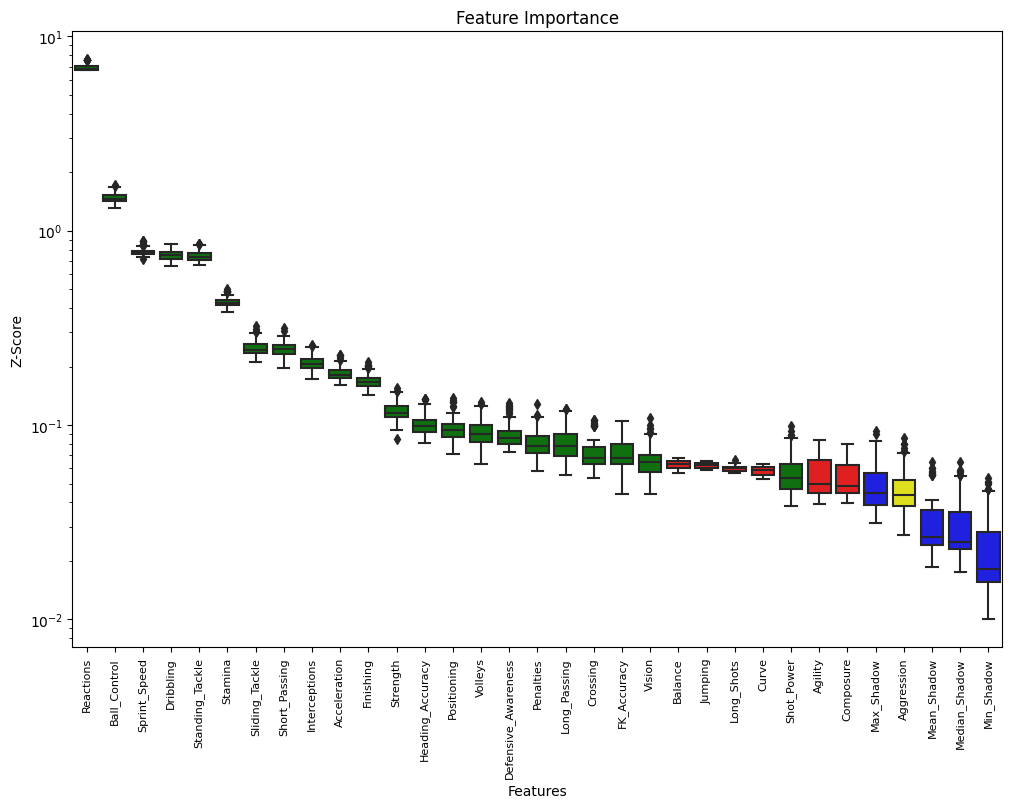

In [10]:
Feature_Selector.plot(which_features='all')